# Exploratory the association between Student Performance Factors and Exam Score

## About Dataset
### Data source
The author is Lai Ng. from the Kaggle website.
### Description
This dataset provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.
## Why we need the prediction for student score by performance?
Predicting student performance aims to understand how these different factors interact and impact students' exam scores. By analyzing historical data on these factors and corresponding exam results, we can build models to forecast students' future academic performance. This has several important implications:

For educators, it can help them identify students who may be at risk of under - performing in advance. They can then provide targeted tutoring, adjust teaching methods, or offer additional learning resources to improve these students' performance.

For parents, it enables them to better understand their children's learning situation and take appropriate measures to support their studies, such as increasing parental involvement or helping them manage study time more effectively.

For students themselves, having an understanding of how different factors affect their performance can allow them to make more informed decisions about their study habits, like increasing study hours or seeking more learning resources.

In the past, predicting student performance might rely on teachers' subjective experience and simple statistical methods. But with the development of data collection techniques and machine learning algorithms, we can now analyze large amounts of data on multiple factors comprehensively to make more accurate predictions.

## Data Preparation

### Import Libraries

In [19]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.style.use("ggplot")
%matplotlib inline

### Loading the data and checking the missing data

In [20]:
df = pd.read_csv(r'E:\dataMining\project\StudentPerformanceFactors.csv')
df.dropna(axis =1 , inplace=True)
print(f"Data loaded successfully! {df.shape[0]} rows and {df.shape[1]} columns.")
df.isnull().sum()

Data loaded successfully! 6607 rows and 17 columns.


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64

### Some example of the data

In [21]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70


## Data visualization

### Let's get the Exam Score Distribution 

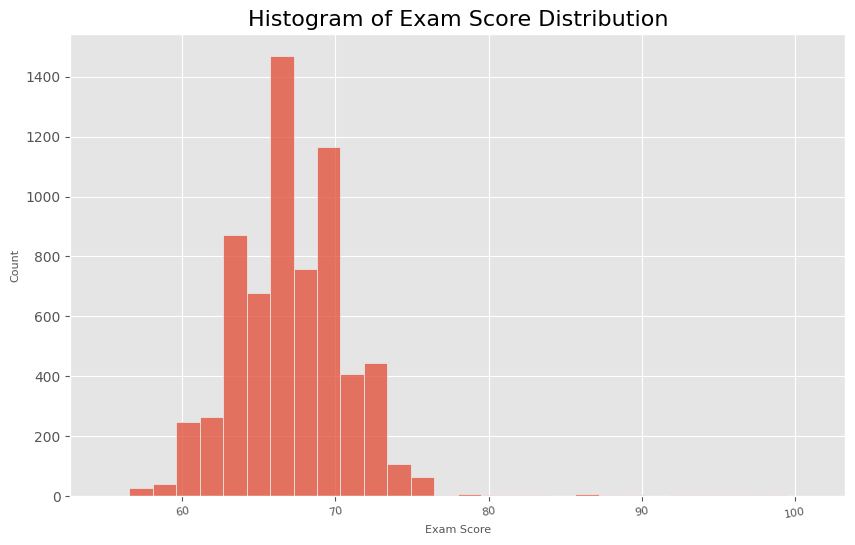

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=30, kde=False)
plt.title('Histogram of Exam Score Distribution', fontsize=16)
plt.xlabel('Exam Score', fontsize=8 )
plt.xticks(rotation=10, fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

### Let's confirm the ratio of men to women to prevent deviations

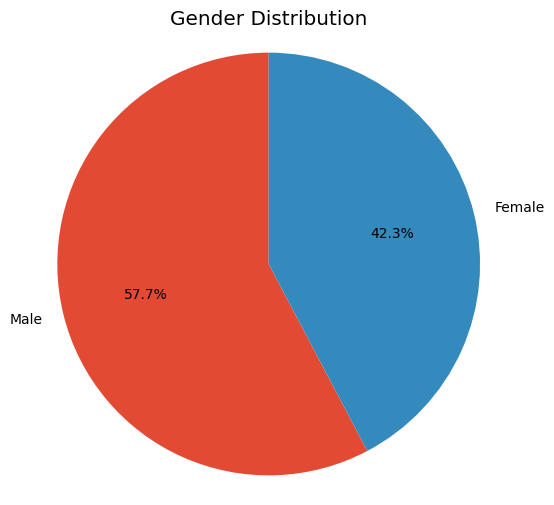

In [23]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

As can be seen from the graph, there is no significant deviation in the sex ratio, so the data is normal

### To show the correlation of test scores with gender and study time

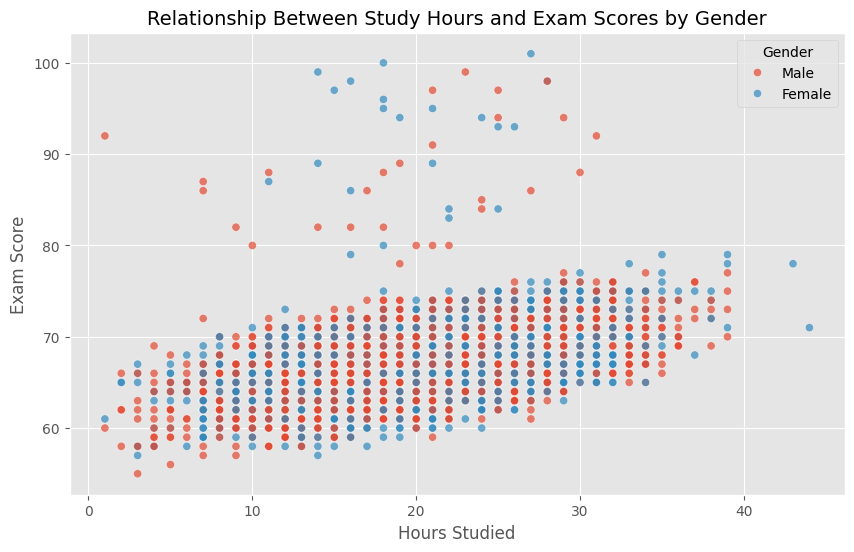

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=df, alpha=0.7)
plt.title('Relationship Between Study Hours and Exam Scores by Gender', fontsize=14)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

### The Relationship Between Attendance and Exam Scores by School Type

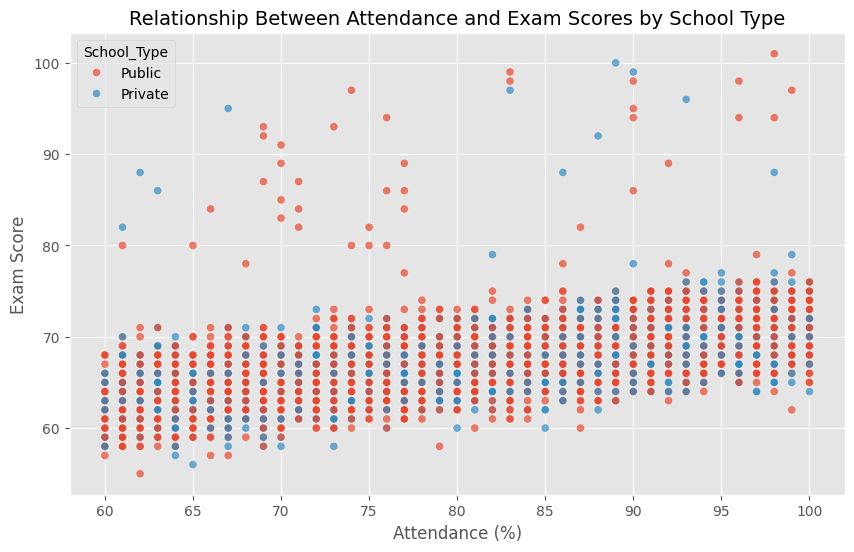

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', hue='School_Type', data=df, alpha=0.7)
plt.title('Relationship Between Attendance and Exam Scores by School Type', fontsize=14)
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.show()

### Average Exam Score by Attendance

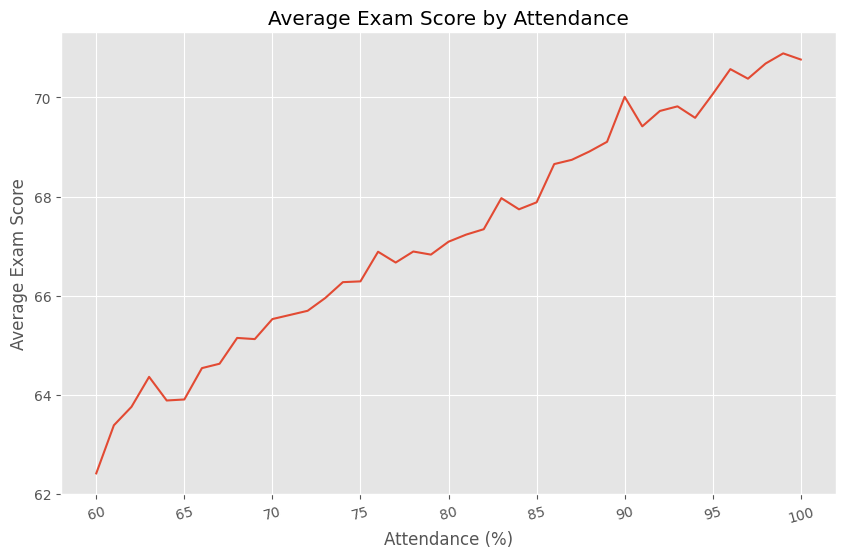

In [27]:
attendance_score = df.groupby('Attendance')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Attendance', y='Exam_Score', data=attendance_score)
plt.title('Average Exam Score by Attendance')
plt.xlabel('Attendance (%)')
plt.xticks(rotation=15)
plt.ylabel('Average Exam Score')
plt.show()

### Average Exam Score by Sleep Hours

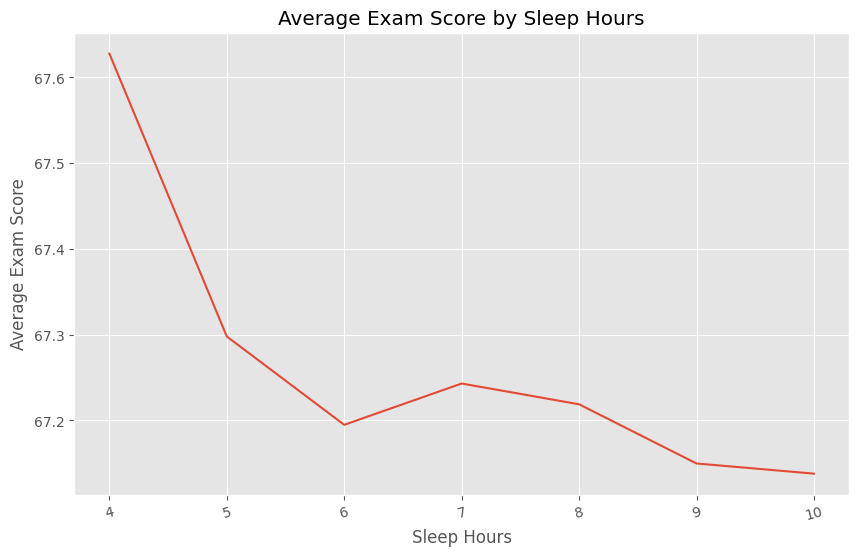

In [28]:
sleep_score = df.groupby('Sleep_Hours')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sleep_Hours', y='Exam_Score', data=sleep_score)
plt.title('Average Exam Score by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.xticks(rotation=15)
plt.ylabel('Average Exam Score')
plt.show()

As we can see from the chart, sleep time and attendance have some impact on test scores.

### Using violin plots to determine the effects of Peer Influence and Motivation Level on academic performance.

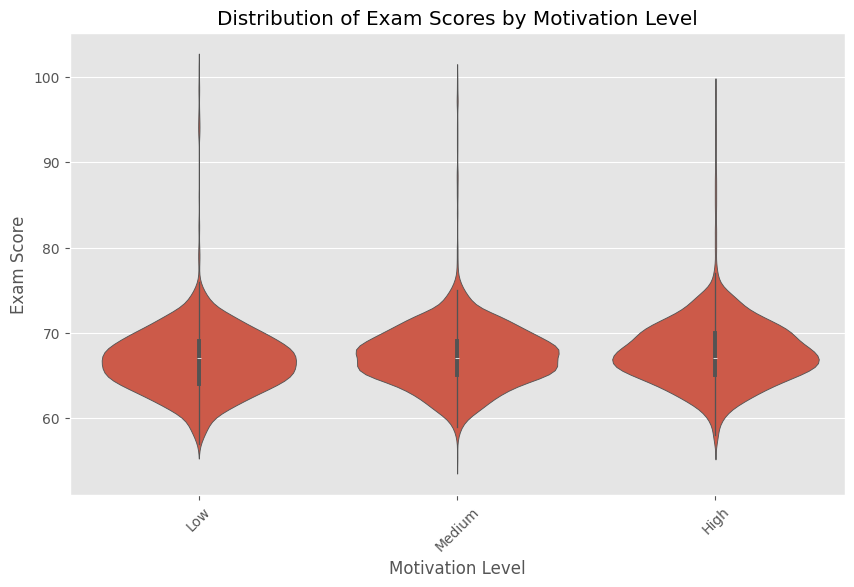

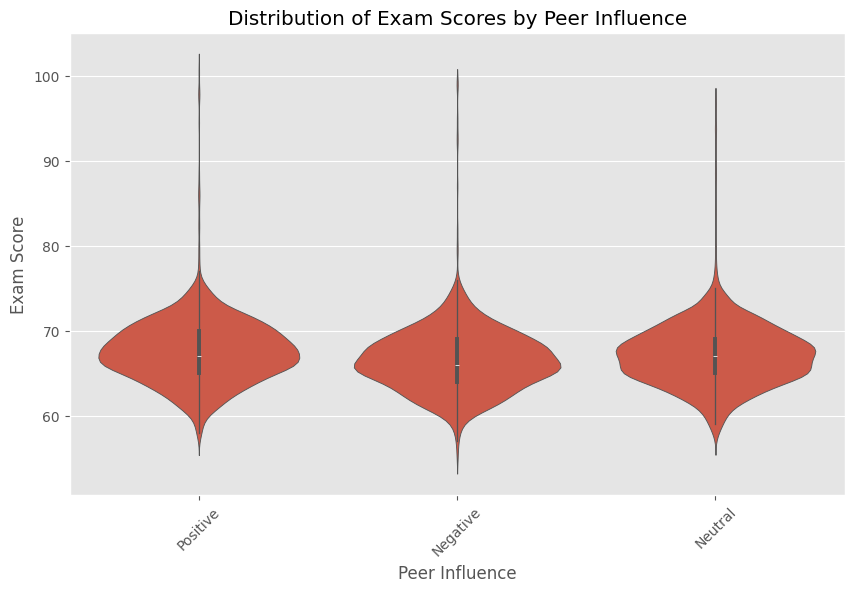

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Distribution of Exam Scores by Motivation Level')
plt.xlabel('Motivation Level')
plt.xticks(rotation=45)
plt.ylabel('Exam Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Peer_Influence', y='Exam_Score', data=df)
plt.title('Distribution of Exam Scores by Peer Influence')
plt.xlabel('Peer Influence')
plt.xticks(rotation=45)
plt.ylabel('Exam Score')
plt.show()

### Using Boxplots to determine the effects of Parental Involvement and Access to Resources on academic performance.

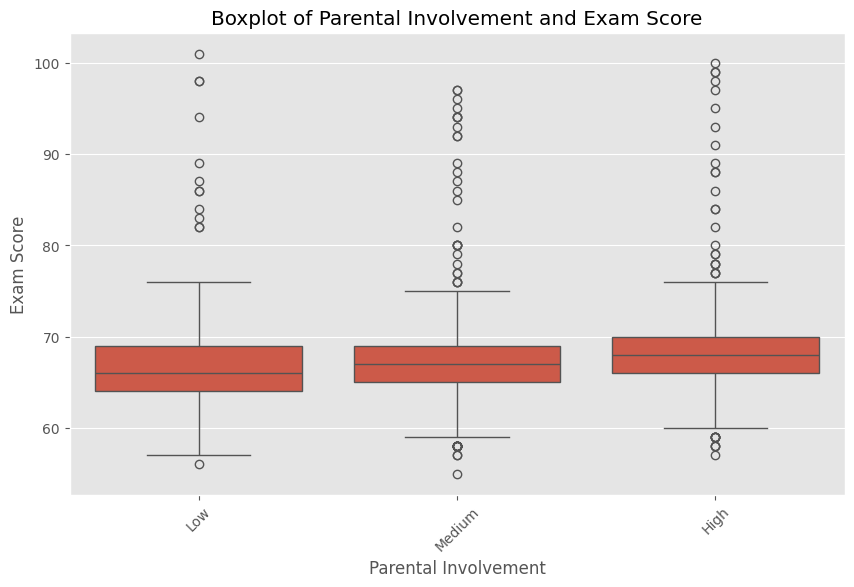

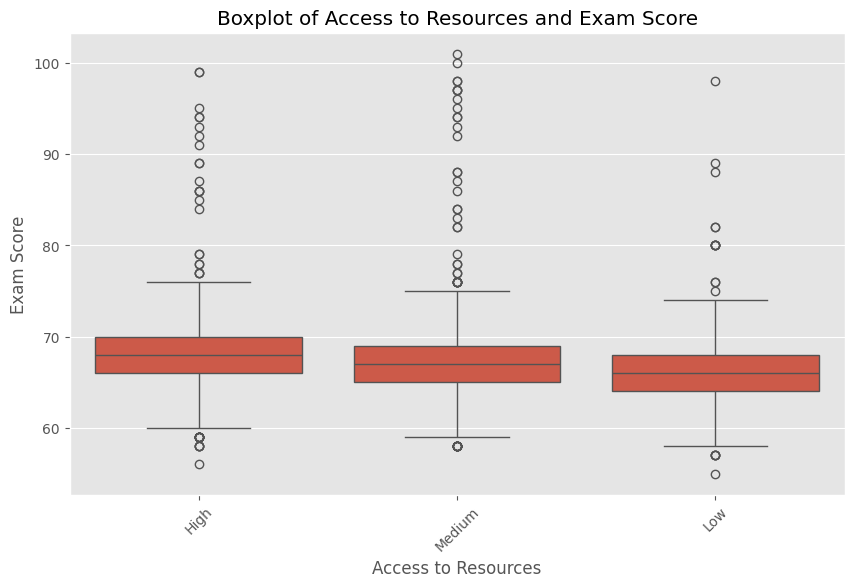

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Boxplot of Parental Involvement and Exam Score')
plt.xlabel('Parental Involvement')
plt.xticks(rotation=45)
plt.ylabel('Exam Score')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Boxplot of Access to Resources and Exam Score')
plt.xlabel('Access to Resources')
plt.xticks(rotation=45)
plt.ylabel('Exam Score')
plt.show()

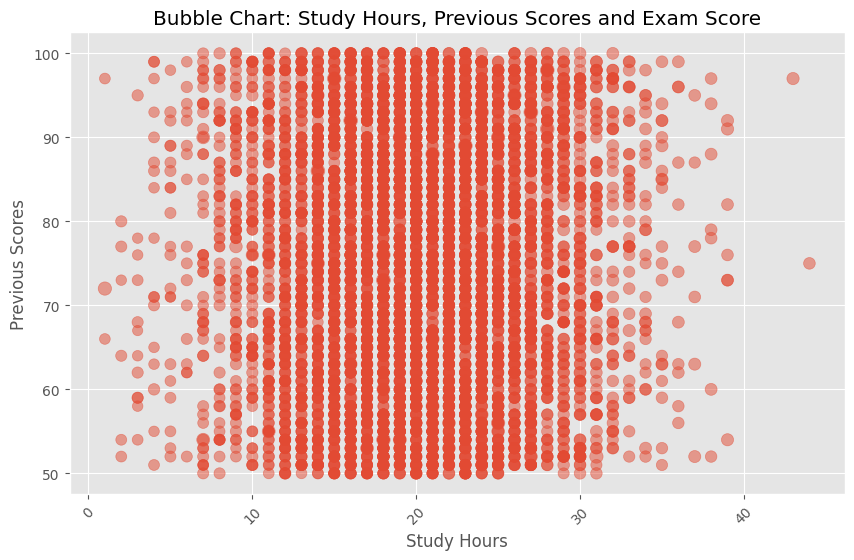

In [12]:
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Studied'], df['Previous_Scores'], s=df['Exam_Score'], alpha=0.5)
plt.title('Bubble Chart: Study Hours, Previous Scores and Exam Score')
plt.xlabel('Study Hours')
plt.xticks(rotation=45)
plt.ylabel('Previous Scores')
plt.show()

When the number of study hours increased from 0 to 40, there was no significant monotonous upward or downward trend in the overall distribution of past grades. This suggests that there may not be a strong linear correlation between learning time and past grades, i.e. an increase or decrease in learning time does not directly determine past grades.


When the study duration is between 10 to 30 hours, the bubbles are relatively denser and there are larger bubbles (representing higher exam scores), indicating that it is easier to achieve higher exam scores within this study duration range. However, when the study duration is less than 10 hours or more than 30 hours, the number of larger bubbles (high exam scores) decreases, which may imply that the study duration is either too short or too long, negatively affecting the improvement of exam scores.

### Heatmap of Correlation Between All Variables After Encoding

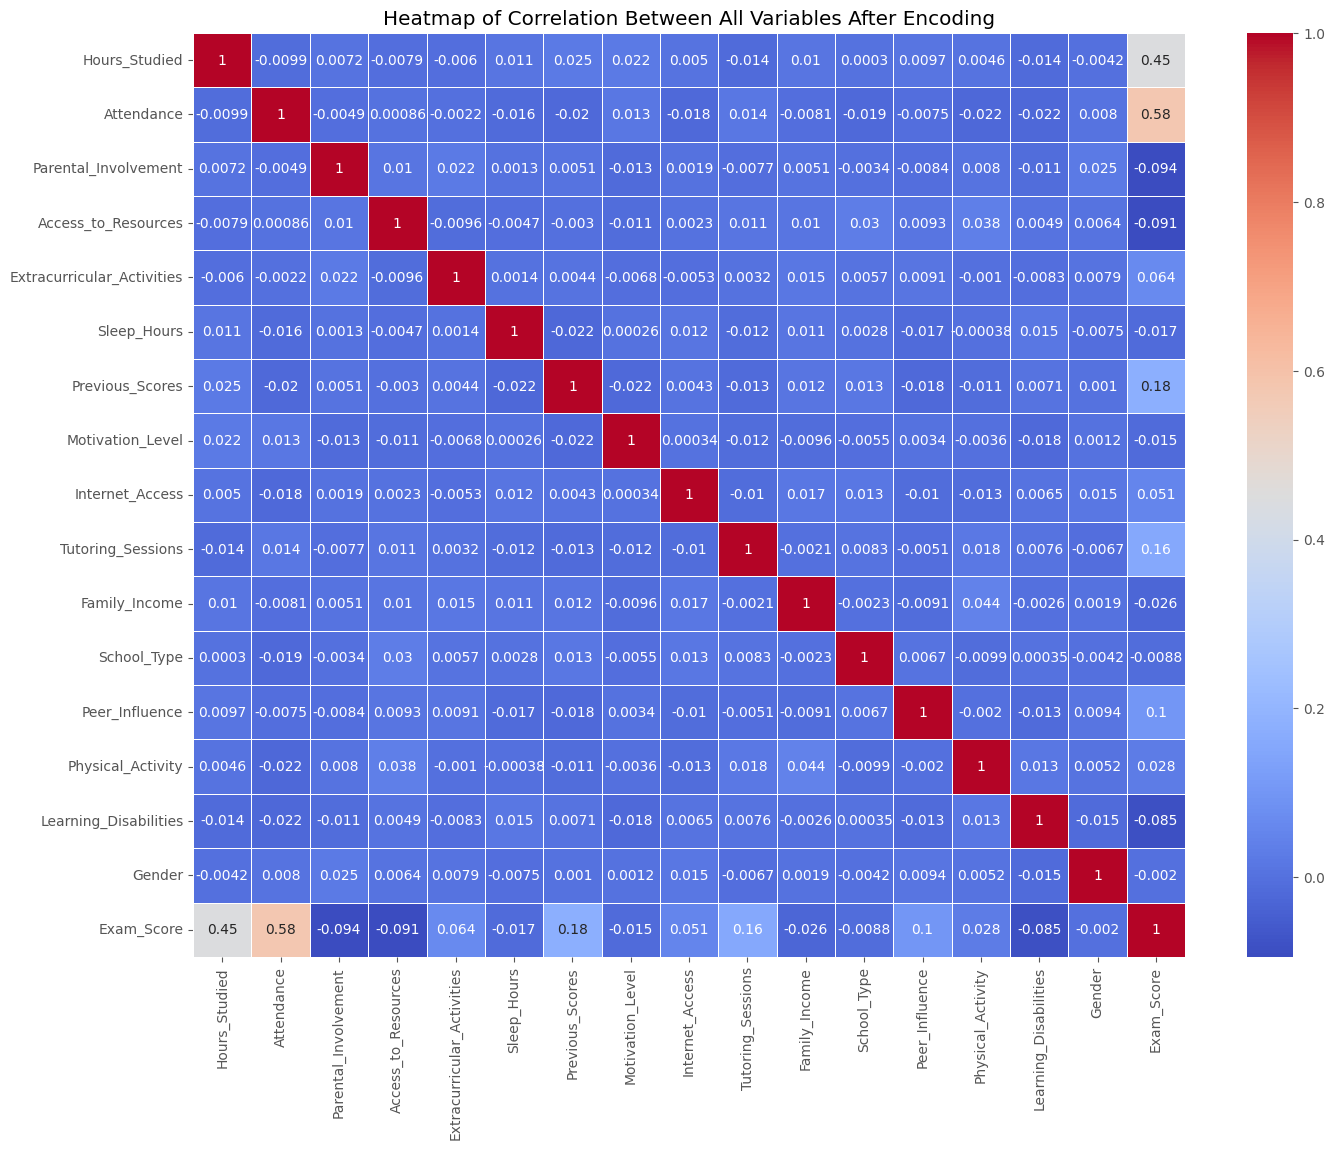

In [13]:
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for column in object_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Between All Variables After Encoding')
plt.show()

This heat map clearly shows whether there is a correlation between the data and academic performance.Exactly the data of Hours_studied and the attendance.